<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Ensemble Techniques</center></font></h1>
<h1><center>Travel Package Purchase Prediction</center></h1>
<h3><center>Charlcye Mitchell, December 2022</center></h3>

#Problem Definition

##Background & Context
You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company have to analyze the customer's data and information to provide recommendations to the Policy Maker and build a model to **predict the potential customer who is going to purchase the newly introduced travel package.** The model will be built to make predictions before a customer is contacted.

##Objective
- Predict which customer is more likely to purchase the newly introduced travel package

##Data Dictionary

**Customer details:**

- **CustomerID:** Unique customer ID
- **ProdTaken:** Whether the customer has purchased a package or not (0: No, 1: Yes)
- **Age:** Age of customer
- **TypeofContact:** How customer was contacted (Company Invited or Self Inquiry)
- **CityTier:** City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- **Occupation:** Occupation of customer
- **Gender:** Gender of customer
- **NumberOfPersonVisiting:** Total number of persons planning to take the trip with the customer
- **PreferredPropertyStar:** Preferred hotel property rating by customer
- **MaritalStatus:** Marital status of customer
- **NumberOfTrips:** Average number of trips in a year by customer
- **Passport:** The customer has a passport or not (0: No, 1: Yes)
- **OwnCar:** Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting:** Total number of children with age less than 5 planning to take the trip with the customer
- **Designation:** Designation of the customer in the current organization
- **MonthlyIncome:** Gross monthly income of the customer

**Customer interaction data:**

- **PitchSatisfactionScore:** Sales pitch satisfaction score
- **ProductPitched:** Product pitched by the salesperson
- **NumberOfFollowups:** Total number of follow-ups has been done by the salesperson after the sales pitch
- **DurationOfPitch:** Duration of the pitch by a salesperson to the customer


#Exploratory Data Analysis

###Importing the necessary packages

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read in the dataset
#df = pd.read_excel(path,sheet_name='Name of the sheet')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tourism.csv')

In [4]:
# looking at head (5 observations) 
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
# count the rows and columns
df.shape

(4888, 20)

In [6]:
# check the null counts and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

We will need missing value treatments for 8 columns. We will need to fix the datatypes for 6 columns.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


##Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

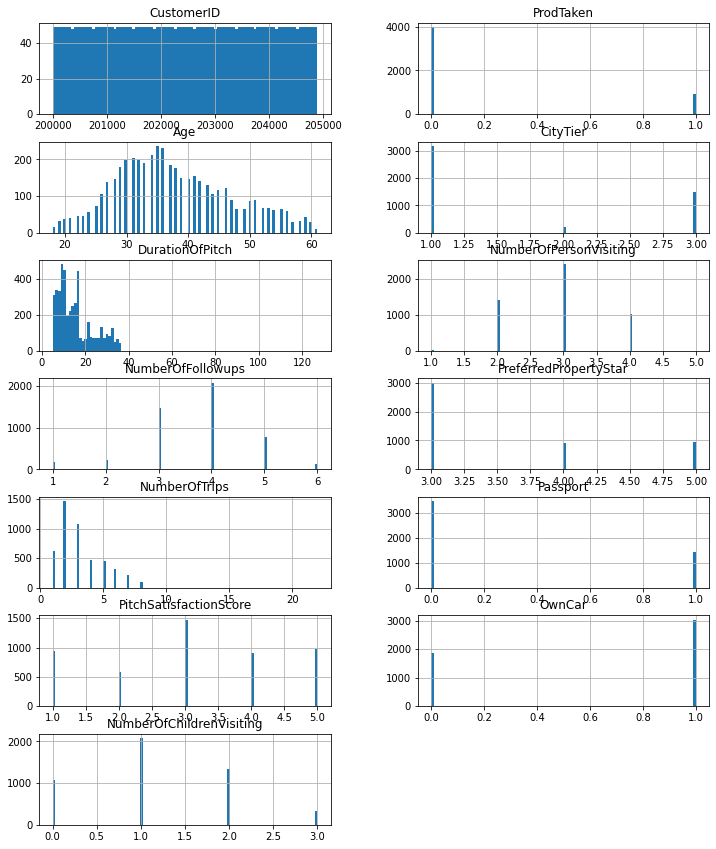

In [10]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

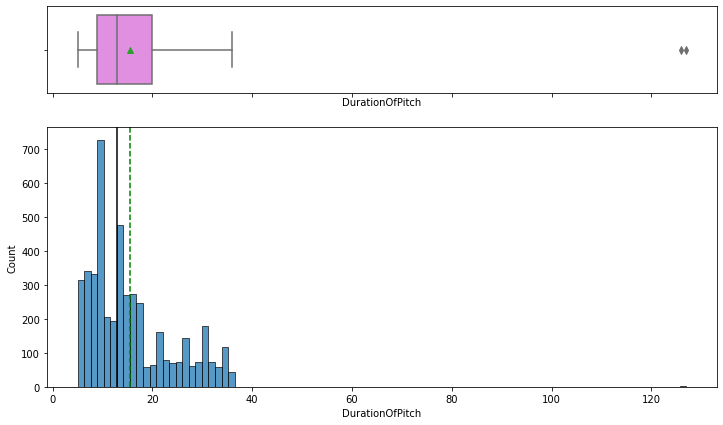

In [11]:
histogram_boxplot(df,'DurationOfPitch')

DurationOfPitch has missing values and is skewed right.

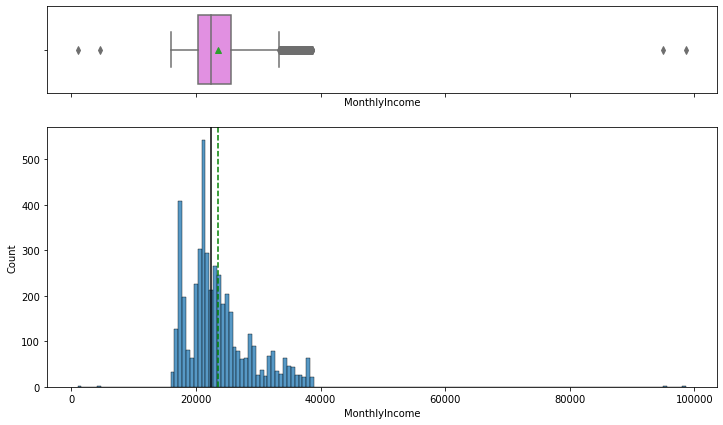

In [12]:
histogram_boxplot(df,'MonthlyIncome')

MonthlyIncome has missing values and is skewed right.

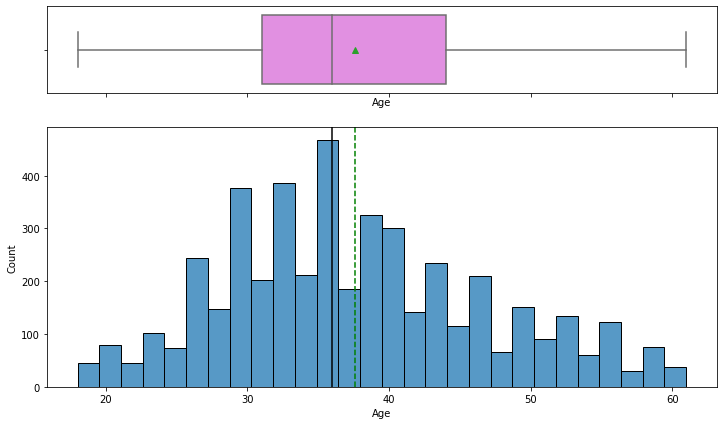

In [13]:
histogram_boxplot(df,'Age')

Age has missing values and is skewed right.

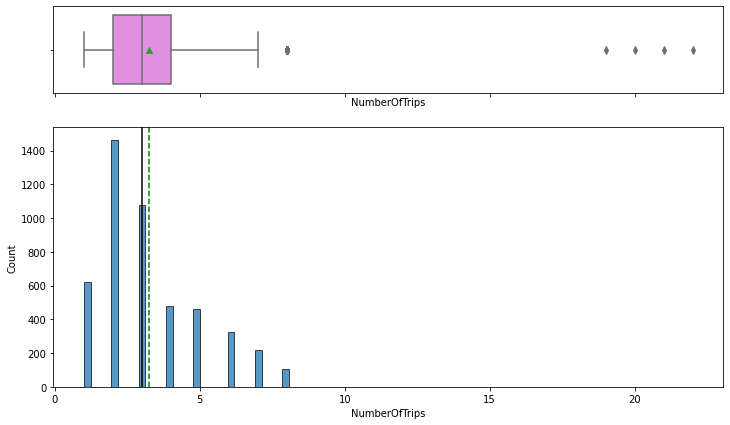

In [14]:
histogram_boxplot(df,'NumberOfTrips')

NumberOfTrips has missing values and is skewed right.

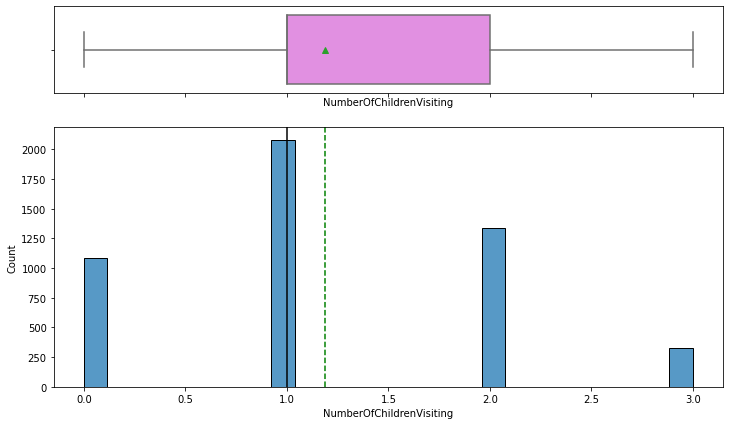

In [15]:
histogram_boxplot(df,'NumberOfChildrenVisiting')

NumberOfChildrenVisiting has missing values and is skewed right.

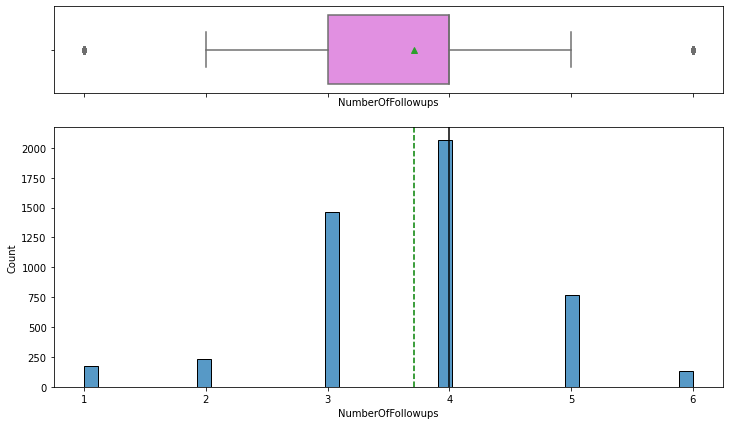

In [16]:
histogram_boxplot(df,'NumberOfFollowups')

NumberOfFollowups has missing values and is skewed right.

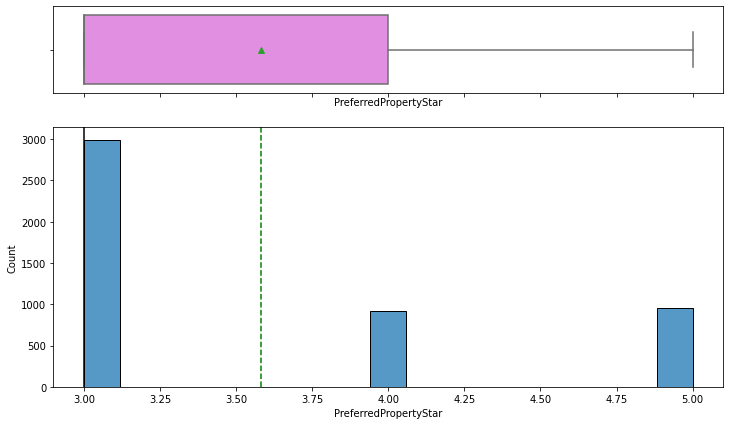

In [17]:
histogram_boxplot(df,'PreferredPropertyStar')

##Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

In [18]:
df.corr() # It will show correlation matrix 

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


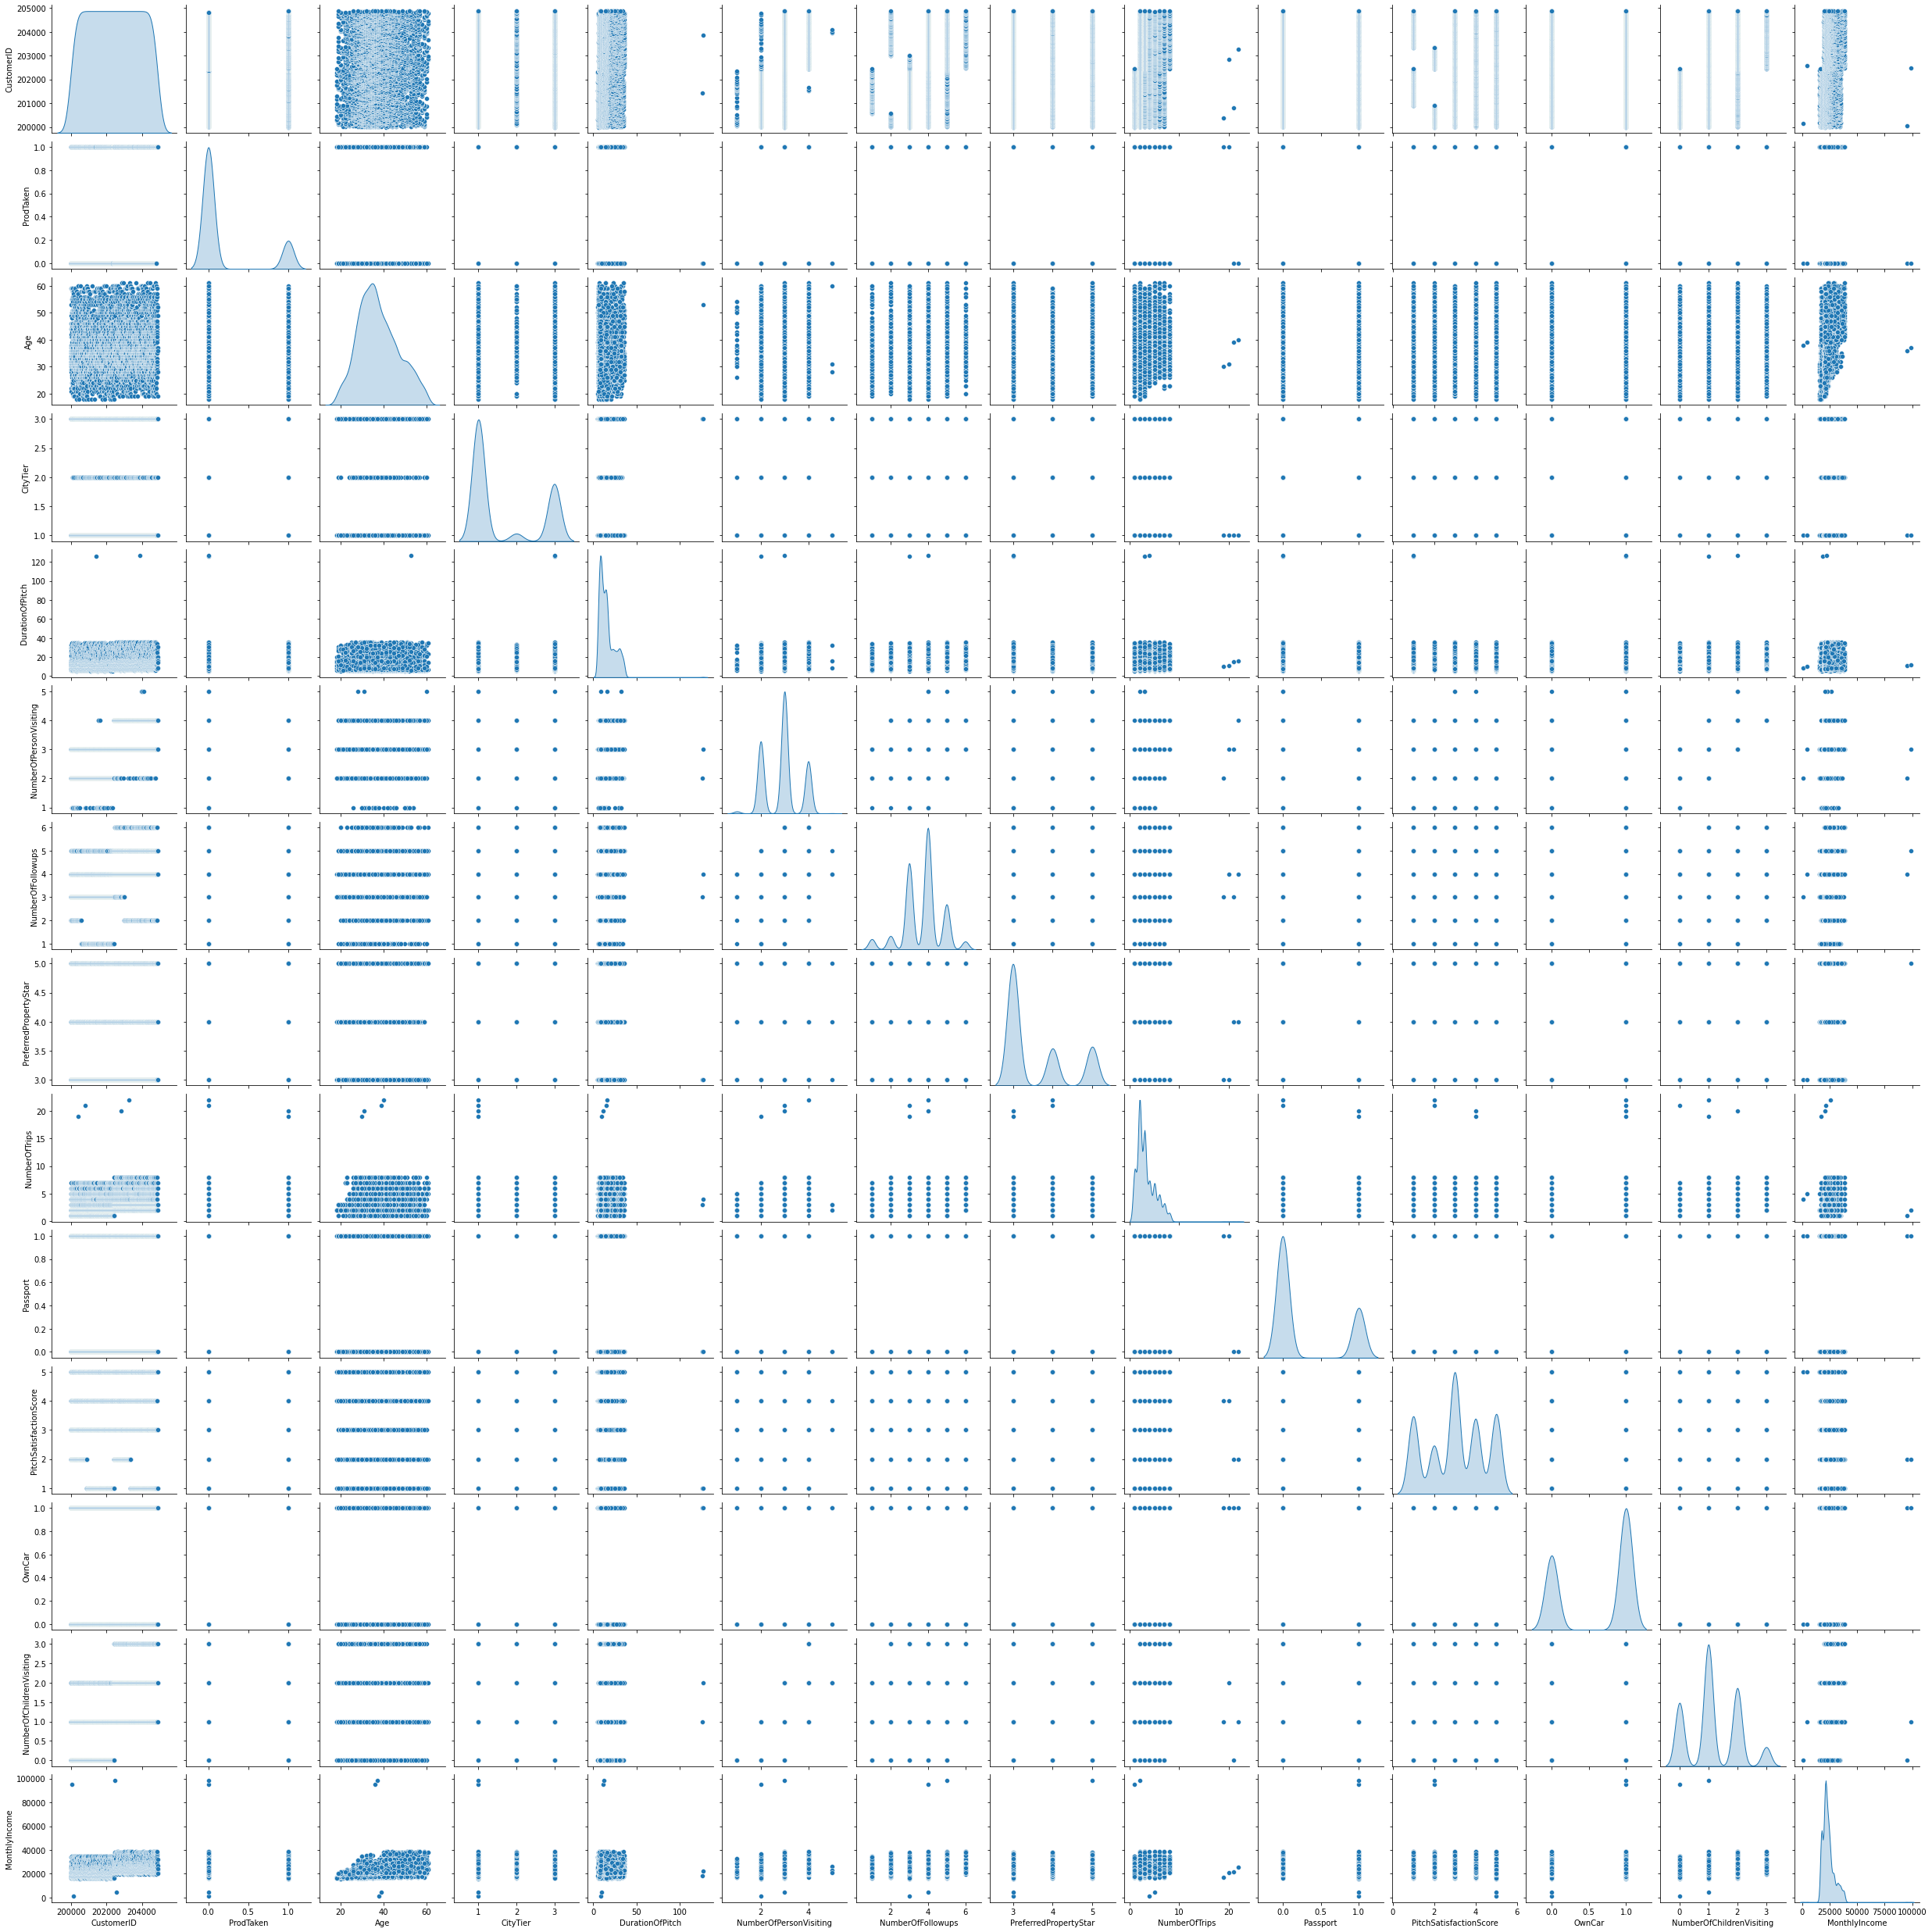

In [19]:
sns.pairplot(df, diag_kind="kde")
plt.show()

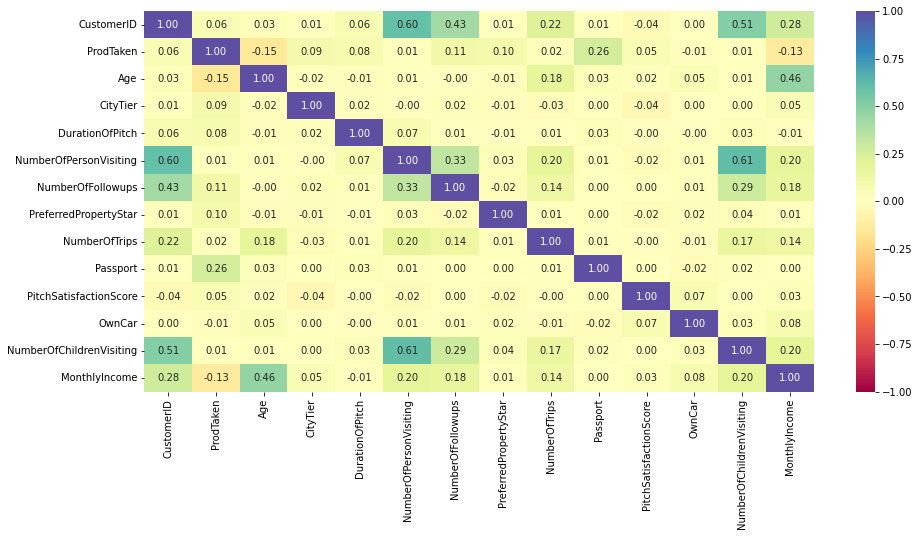

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

##Customer Profiling
- Create a profile of the customers (for example demographic information) who purchased a package. 
- The profile has to be created for each of the 5 packages - Basic, Standard, Deluxe, Super Deluxe, and King. 
- Provide at least 3 points to distinguish features for each package) 

In [21]:
# Filter the dataset to include only the data for customers who accept the Basic travel package
filtered_data_basic = df[(df['ProductPitched'] == 'Basic') & (df['ProdTaken'] == 1)]

In [22]:
# Filter the dataset to include only the data for customers who accept the Deluxe travel package
filtered_data_deluxe = df[(df['ProductPitched'] == 'Deluxe') & (df['ProdTaken'] == 1)]

In [23]:
# Filter the dataset to include only the data for customers who accept the Standard travel package
filtered_data_standard = df[(df['ProductPitched'] == 'Standard') & (df['ProdTaken'] == 1)]

In [24]:
# Filter the dataset to include only the data for customers who accept the Super Deluxe travel package
filtered_data_superdeluxe = df[(df['ProductPitched'] == 'Super Deluxe') & (df['ProdTaken'] == 1)]

In [25]:
# Filter the dataset to include only the data for customers who accept the King travel package
filtered_data_king = df[(df['ProductPitched'] == 'King') & (df['ProdTaken'] == 1)]

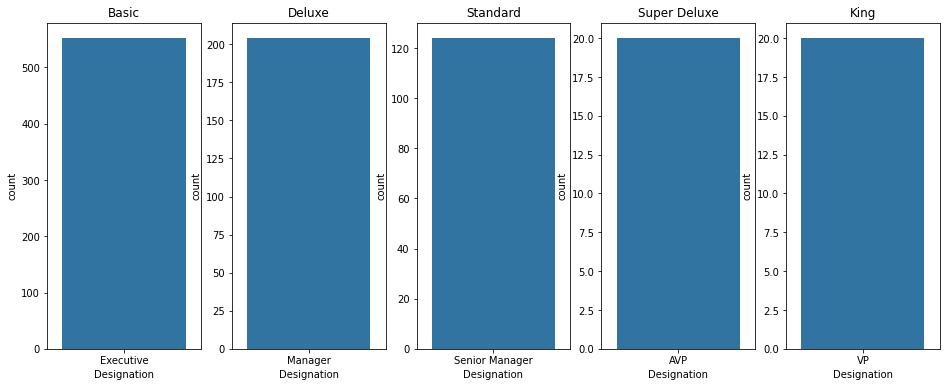

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='Designation', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='Designation', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='Designation', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='Designation', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='Designation', ax=axes[4]).set_title("King")

plt.show()

*   Everyone who bought the basic package had an "executive" designation.
*   Everyone who bought the deluxe package had a "manager" designation.
*   Everyone who bought the standard package had a "senior manager" designation.
*   Everyone who bought the super deluxe package had an "AVP" designation.
*   Everyone who bought the king package had a "VP" designation.

The company likely pre-selects which package is offered to the target based on their designation.  I'd have to re-filter the data based on packages that weren't accepted (['ProdTaken'] == 0) to verify whether this is true.

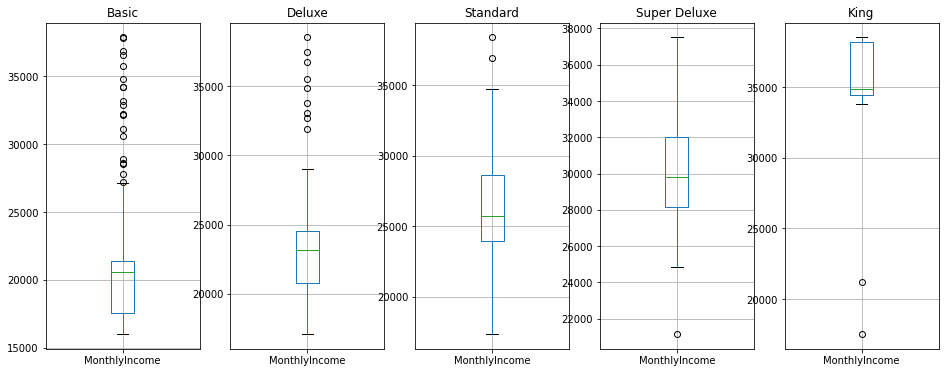

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

filtered_data_basic.boxplot(column='MonthlyIncome', by=None, ax=axes[0]).set_title("Basic")
filtered_data_deluxe.boxplot(column='MonthlyIncome', by=None, ax=axes[1]).set_title("Deluxe")
filtered_data_standard.boxplot(column='MonthlyIncome', by=None, ax=axes[2]).set_title("Standard")
filtered_data_superdeluxe.boxplot(column='MonthlyIncome', by=None, ax=axes[3]).set_title("Super Deluxe")
filtered_data_king.boxplot(column='MonthlyIncome', by=None, ax=axes[4]).set_title("King")

plt.show()

❗ This is a good lesson in not putting box plots next to each other, since the axis don't line up very well.

*   Customers who are most likely to purchase the basic package have a monthly income range of 17-22k
*   Customers who are most likely to purchase the deluxe package have a monthly income range of 21-24k
*   Customers who are most likely to purchase the standard package have a monthly income range of 24-28k
*   Customers who are most likely to purchase the super deluxe package have a monthly income range of 28-32k
*   Customers who are most likely to purchase the king package have a monthly income range of 34-38k

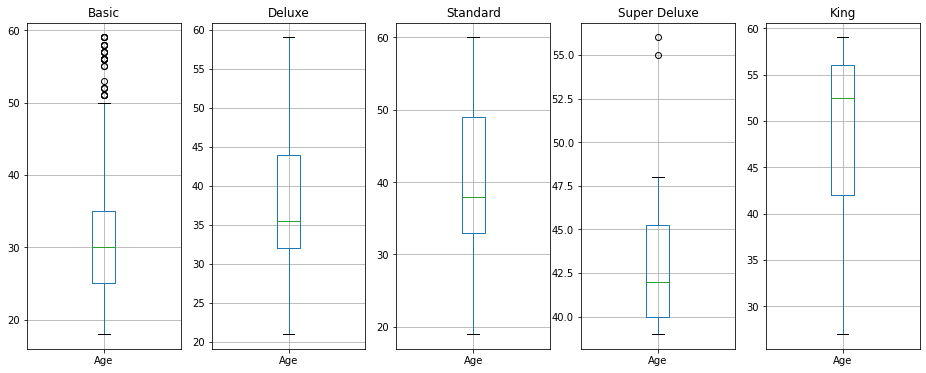

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(16, 6))

filtered_data_basic.boxplot(column='Age', by=None, ax=axes[0]).set_title("Basic")
filtered_data_deluxe.boxplot(column='Age', by=None, ax=axes[1]).set_title("Deluxe")
filtered_data_standard.boxplot(column='Age', by=None, ax=axes[2]).set_title("Standard")
filtered_data_superdeluxe.boxplot(column='Age', by=None, ax=axes[3]).set_title("Super Deluxe")
filtered_data_king.boxplot(column='Age', by=None, ax=axes[4]).set_title("King")

plt.show()

*   Customers who are most likely to purchase the basic package are mostly age 25-35.
*   Customers who are most likely to purchase the deluxe package are mostly age 33-44.
*   Customers who are most likely to purchase the standard package are mostly age 32-49.
*   Customers who are most likely to purchase the super deluxe package are mostly age 40-46. 
*   Customers who are most likely to purchase the king package are mostly age 43-56.

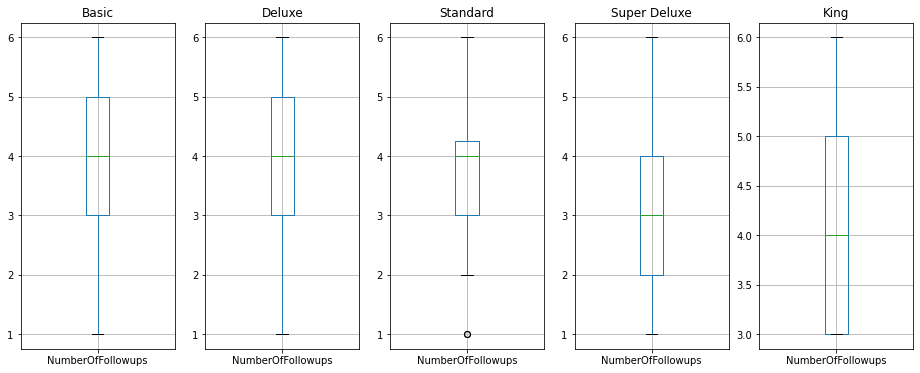

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

filtered_data_basic.boxplot(column='NumberOfFollowups', by=None, ax=axes[0]).set_title("Basic")
filtered_data_deluxe.boxplot(column='NumberOfFollowups', by=None, ax=axes[1]).set_title("Deluxe")
filtered_data_standard.boxplot(column='NumberOfFollowups', by=None, ax=axes[2]).set_title("Standard")
filtered_data_superdeluxe.boxplot(column='NumberOfFollowups', by=None, ax=axes[3]).set_title("Super Deluxe")
filtered_data_king.boxplot(column='NumberOfFollowups', by=None, ax=axes[4]).set_title("King")

plt.show()

*   Customers are most likely to purchase the basic package after 3-5 follow ups.
*   Customers are most likely to purchase the deluxe package after 3-5 follow ups.
*   Customers are most likely to purchase the standard package after 3-4 follow ups. 
*   Customers are most likely to purchase the super deluxe package after fewer follow ups than other groups: 2-4 rather than 3-5. 
*   Customers are most likely to purchase the king package after 3-5 follow ups. 

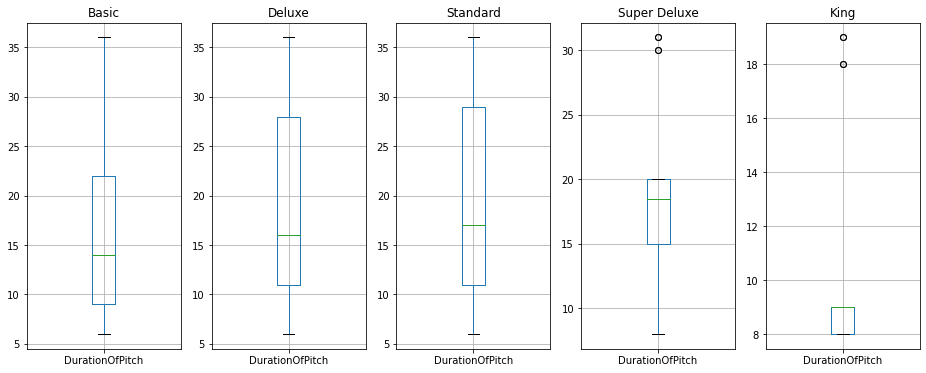

In [30]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

filtered_data_basic.boxplot(column='DurationOfPitch', by=None, ax=axes[0]).set_title("Basic")
filtered_data_deluxe.boxplot(column='DurationOfPitch', by=None, ax=axes[1]).set_title("Deluxe")
filtered_data_standard.boxplot(column='DurationOfPitch', by=None, ax=axes[2]).set_title("Standard")
filtered_data_superdeluxe.boxplot(column='DurationOfPitch', by=None, ax=axes[3]).set_title("Super Deluxe")
filtered_data_king.boxplot(column='DurationOfPitch', by=None, ax=axes[4]).set_title("King")

plt.show()

*   Customers are most likely to purchase the basic package after a pitch of 9-21 minutes.
*   Customers are most likely to purchase the deluxe package after a pitch of 12-26 minutes.
*   Customers are most likely to purchase the standard package after a pitch of 11-29 minutes.
*   Customers are most likely to purchase the super deluxe package after a pitch of 15-20 minutes.
*   Customers are most likely to purchase the king package after a pitch of 8-9 minutes, significantly shorter pitch time than other groups.

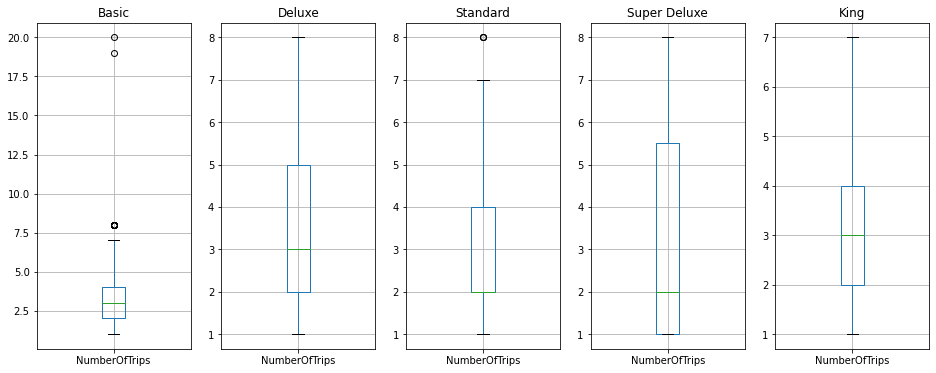

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

filtered_data_basic.boxplot(column='NumberOfTrips', by=None, ax=axes[0]).set_title("Basic")
filtered_data_deluxe.boxplot(column='NumberOfTrips', by=None, ax=axes[1]).set_title("Deluxe")
filtered_data_standard.boxplot(column='NumberOfTrips', by=None, ax=axes[2]).set_title("Standard")
filtered_data_superdeluxe.boxplot(column='NumberOfTrips', by=None, ax=axes[3]).set_title("Super Deluxe")
filtered_data_king.boxplot(column='NumberOfTrips', by=None, ax=axes[4]).set_title("King")

plt.show()

*   Customers who are most likely to purchase the basic package take 2-3 trips per year.
*   Customers who are most likely to purchase the deluxe package take 2-5 trips per year.
*   Customers who are most likely to purchase the standard package take 2-4 trips per year.
*   Customers who are most likely to purchase the super deluxe package take 1-5 trips per year.
*   Customers who are most likely to purchase the king package take 2-3 trips per year.

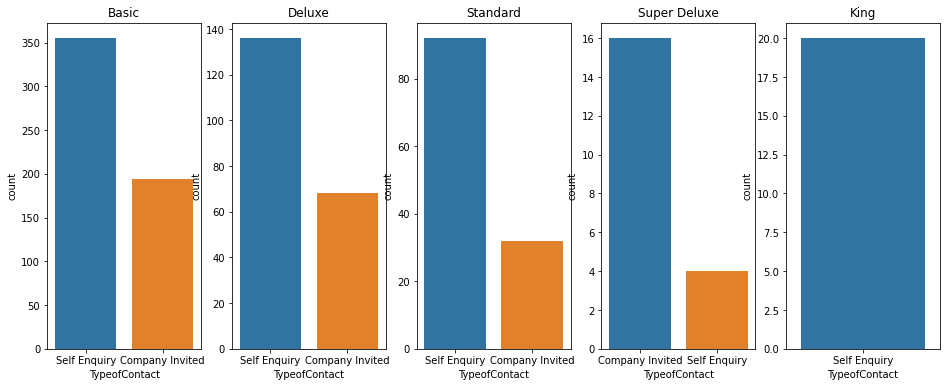

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='TypeofContact', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='TypeofContact', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='TypeofContact', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='TypeofContact', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='TypeofContact', ax=axes[4]).set_title("King")

plt.show()

In [33]:
filtered_data_basic.TypeofContact.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Self Enquiry       64.7%
Company Invited    35.3%
Name: TypeofContact, dtype: object

In [34]:
filtered_data_deluxe.TypeofContact.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Self Enquiry       66.7%
Company Invited    33.3%
Name: TypeofContact, dtype: object

In [35]:
filtered_data_standard.TypeofContact.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Self Enquiry       74.2%
Company Invited    25.8%
Name: TypeofContact, dtype: object

In [36]:
filtered_data_superdeluxe.TypeofContact.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Company Invited    80.0%
Self Enquiry       20.0%
Name: TypeofContact, dtype: object

In [37]:
filtered_data_king.TypeofContact.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Self Enquiry    100.0%
Name: TypeofContact, dtype: object

*   65% of customers who purchase the basic package are self-enquiry contacts.
*   67% of customers who purchase the deluxe package are self-enquiry contacts.
*   75% of customers who purchase the standard package are self-enquiry contacts.
*   80% of customers who purchase the super deluxe package are company-invited contacts. This is the only package where the majority of contacts are not self-enquiry contacts.
*  100% of customers who purchase the king package are self-enquiry contacts. 

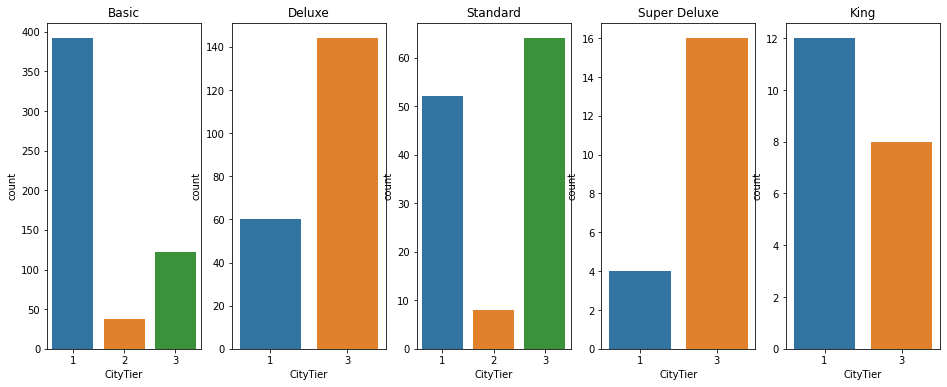

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='CityTier', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='CityTier', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='CityTier', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='CityTier', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='CityTier', ax=axes[4]).set_title("King")

plt.show()

In [39]:
filtered_data_basic.CityTier.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    71.0%
3    22.1%
2     6.9%
Name: CityTier, dtype: object

In [40]:
filtered_data_deluxe.CityTier.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

3    70.6%
1    29.4%
Name: CityTier, dtype: object

In [41]:
filtered_data_standard.CityTier.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

3    51.6%
1    41.9%
2     6.5%
Name: CityTier, dtype: object

In [42]:
filtered_data_superdeluxe.CityTier.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

3    80.0%
1    20.0%
Name: CityTier, dtype: object

In [43]:
filtered_data_king.CityTier.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    60.0%
3    40.0%
Name: CityTier, dtype: object

*   71% of customers who purchase the basic package are from Tier 1 cities.
*   71% of customers who purchase the deluxe package are from Tier 3 cities.
*   52% of customers who purchase the standard package are from Tier 3 cities, and 42% are from Tier 1 cities.
*   80% of customers who purchase the super deluxe package are from Tier 3 cities.
*   60% of customers who purchase the king package are from Tier 1 cities, and 40% are from Tier 3 cities.

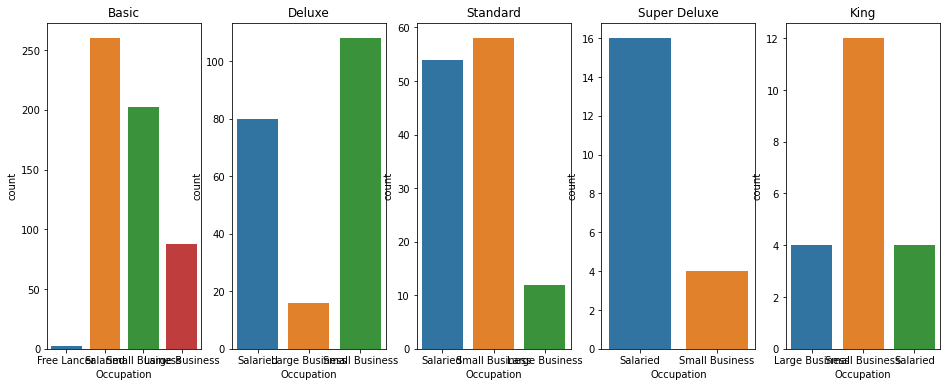

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='Occupation', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='Occupation', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='Occupation', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='Occupation', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='Occupation', ax=axes[4]).set_title("King")

plt.show()

In [45]:
filtered_data_basic.Occupation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Salaried          47.1%
Small Business    36.6%
Large Business    15.9%
Free Lancer        0.4%
Name: Occupation, dtype: object

In [46]:
filtered_data_deluxe.Occupation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Small Business    52.9%
Salaried          39.2%
Large Business     7.8%
Name: Occupation, dtype: object

In [47]:
filtered_data_standard.Occupation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Small Business    46.8%
Salaried          43.5%
Large Business     9.7%
Name: Occupation, dtype: object

In [48]:
filtered_data_superdeluxe.Occupation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Salaried          80.0%
Small Business    20.0%
Name: Occupation, dtype: object

In [49]:
filtered_data_king.Occupation.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Small Business    60.0%
Large Business    20.0%
Salaried          20.0%
Name: Occupation, dtype: object

*   47% of customers who purchase the basic package are salaried, and 37% are small business.
*   53% of customers who purchase the deluxe package are small business, and 39% are salaried.
*   47% of customers who purchase the standard package are small business, and 44% are salaried.
*   80% of customers who purchase the super deluxe package are salaried. This is the only category where the vast majority of purchasers are salaried.  It's also the smallest sample size.
*   60% of customers who purchase the king package are small business, and the remaining 40% are equally split between large business and salaried.

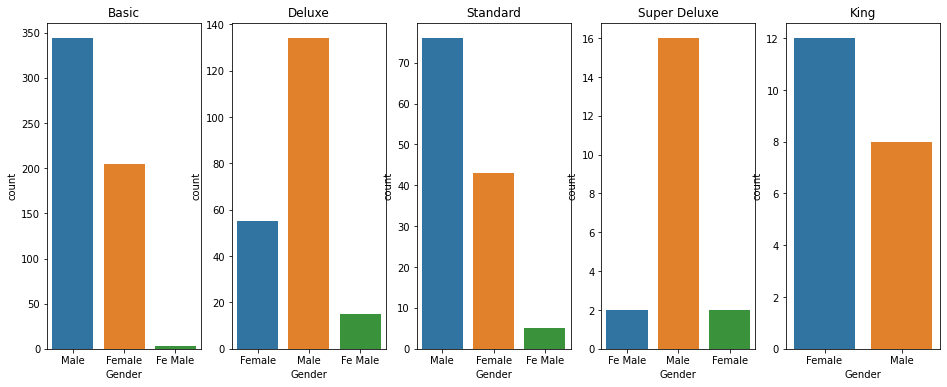

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='Gender', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='Gender', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='Gender', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='Gender', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='Gender', ax=axes[4]).set_title("King")

plt.show()

In [51]:
filtered_data_basic.Gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male       62.3%
Female     37.1%
Fe Male     0.5%
Name: Gender, dtype: object

In [52]:
filtered_data_deluxe.Gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male       65.7%
Female     27.0%
Fe Male     7.4%
Name: Gender, dtype: object

In [53]:
filtered_data_standard.Gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male       61.3%
Female     34.7%
Fe Male     4.0%
Name: Gender, dtype: object

In [54]:
filtered_data_superdeluxe.Gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male       80.0%
Fe Male    10.0%
Female     10.0%
Name: Gender, dtype: object

In [55]:
filtered_data_king.Gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Female    60.0%
Male      40.0%
Name: Gender, dtype: object

*   62% of customers who purchase the basic package are male.
*   66% of customers who purchase the deluxe package are male.
*   62% of customers who purchase the standard package are male.
*   80% of customers who purchase the super deluxe package are male.
*   60% of customers who purchase the king package are female.

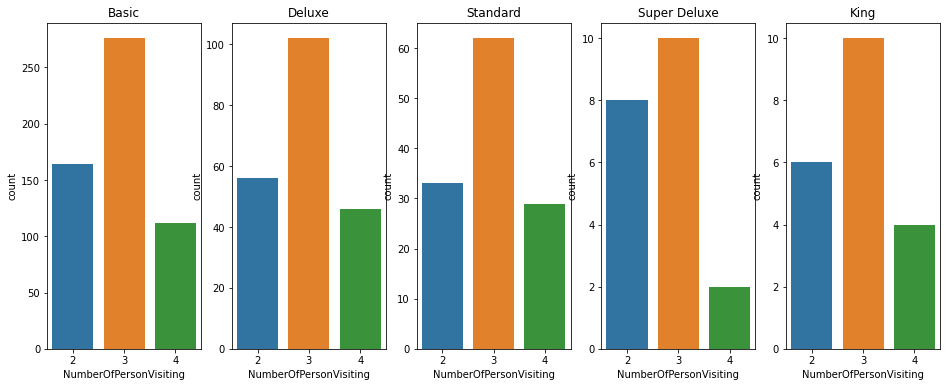

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='NumberOfPersonVisiting', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='NumberOfPersonVisiting', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='NumberOfPersonVisiting', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='NumberOfPersonVisiting', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='NumberOfPersonVisiting', ax=axes[4]).set_title("King")

plt.show()

😰 EDA fatigue is real.

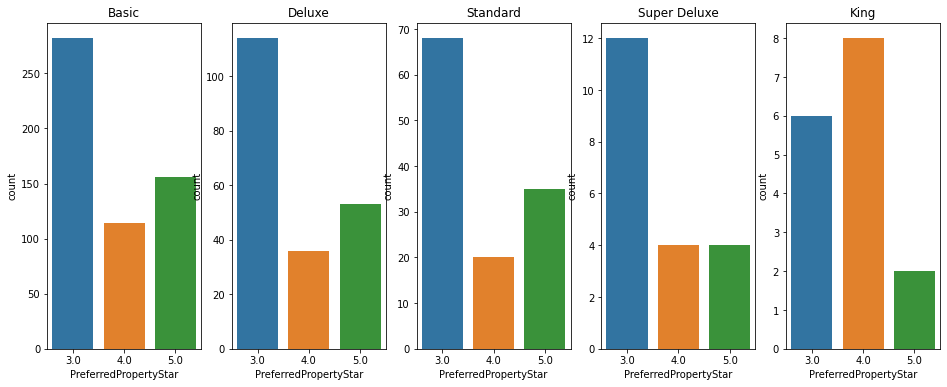

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='PreferredPropertyStar', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='PreferredPropertyStar', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='PreferredPropertyStar', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='PreferredPropertyStar', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='PreferredPropertyStar', ax=axes[4]).set_title("King")

plt.show()

*   Customers who purchase the basic package mostly prefer 3 star properties.
*   Customers who purchase the deluxe package mostly prefer 3 star properties.
*   Customers who purchase the standard package mostly prefer 3 star properties.
*   Customers who purchase the super deluxe package mostly prefer 3 star properties.
*   Customers who purchase the king package mostly prefer 3 or 4 star properties.

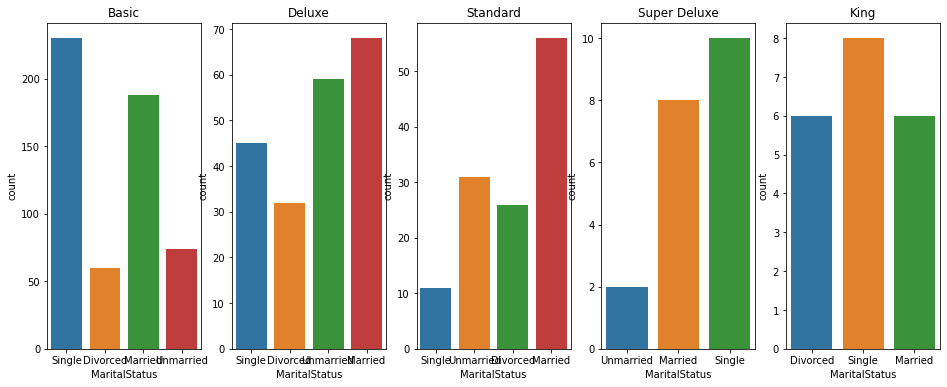

In [58]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='MaritalStatus', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='MaritalStatus', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='MaritalStatus', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='MaritalStatus', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='MaritalStatus', ax=axes[4]).set_title("King")

plt.show()

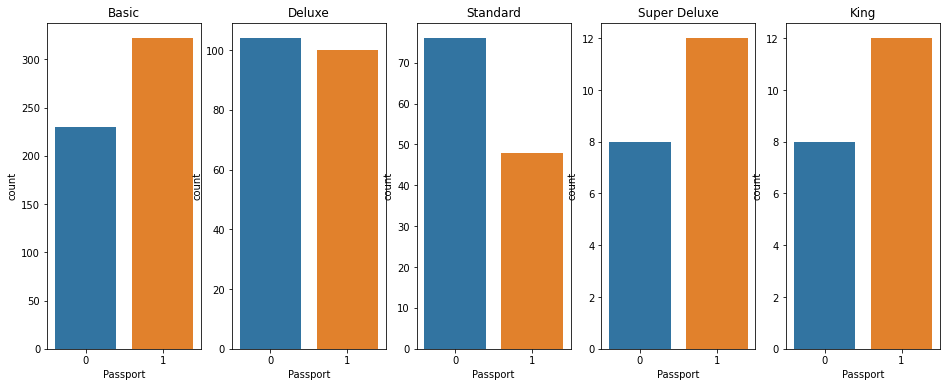

In [59]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='Passport', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='Passport', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='Passport', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='Passport', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='Passport', ax=axes[4]).set_title("King")

plt.show()

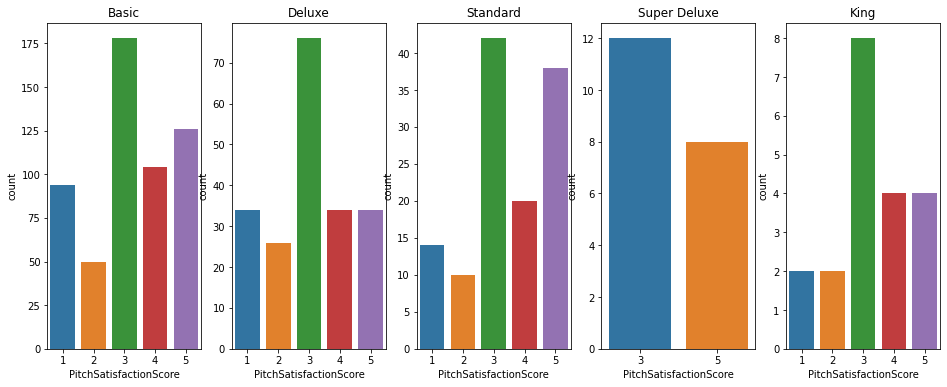

In [60]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='PitchSatisfactionScore', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='PitchSatisfactionScore', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='PitchSatisfactionScore', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='PitchSatisfactionScore', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='PitchSatisfactionScore', ax=axes[4]).set_title("King")

plt.show()

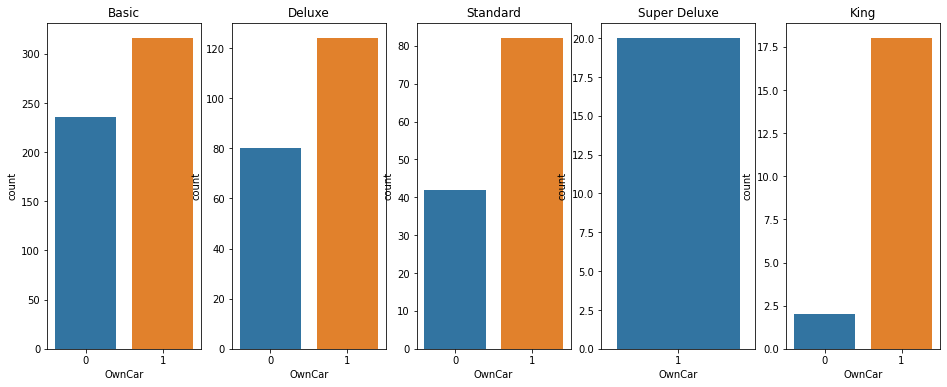

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='OwnCar', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='OwnCar', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='OwnCar', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='OwnCar', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='OwnCar', ax=axes[4]).set_title("King")

plt.show()

*   No customers without cars purchase the super deluxe package.
*   Very few customers without cars purchase the king package.

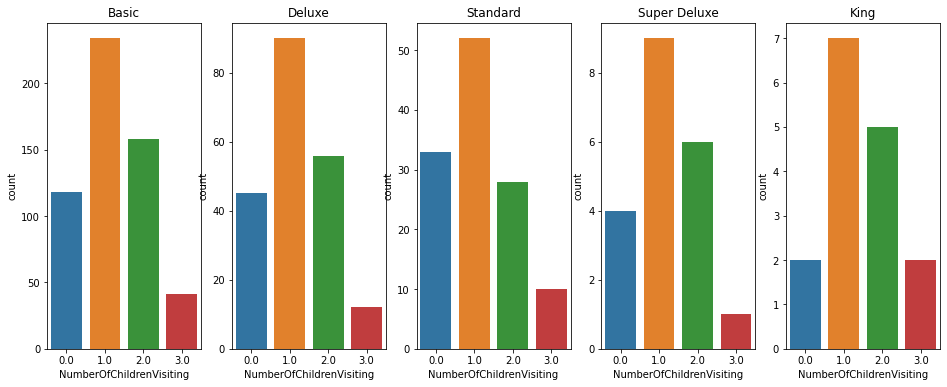

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))

sns.countplot(data=filtered_data_basic, x='NumberOfChildrenVisiting', ax=axes[0]).set_title("Basic")
sns.countplot(data=filtered_data_deluxe, x='NumberOfChildrenVisiting', ax=axes[1]).set_title("Deluxe")
sns.countplot(data=filtered_data_standard, x='NumberOfChildrenVisiting', ax=axes[2]).set_title("Standard")
sns.countplot(data=filtered_data_superdeluxe, x='NumberOfChildrenVisiting', ax=axes[3]).set_title("Super Deluxe")
sns.countplot(data=filtered_data_king, x='NumberOfChildrenVisiting', ax=axes[4]).set_title("King")

plt.show()

###Profiling Insights

Here are some criteria the company can use to quickly select which package to market to a given lead:

Pitch This|Designation|Monthly Income|Age|Lead type|Car Required
---|---|---|---|---|---
*Basic*|Executive|17-22k|20's-early 30's|Inbound|No
*Deluxe*|Manager|21-24k|30s-40s|Inbound|No
*Standard*|Sr. Manager|24-28k|30s-40s|Inbound|No
*Super Deluxe*|AVP|28-32k|20's-early 30's|Outbound|Yes
*King*|VP|34-38k|40s-50s|Inbound|Yes

##Data Preprocessing

In [63]:
df.drop(['CustomerID'],axis=1,inplace=True) 

###Fixing Datatypes

In [64]:
cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']
df[cat_cols] = df[cat_cols].astype('category')

cols = df.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info() #rechecking the dataset    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

###Missing Value Treatment

In [65]:
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [66]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Age')
missing_numerical.remove('MonthlyIncome')
missing_numerical

['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips']

In [67]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [68]:
#we will replace the missing values with median income w.r.t the customer's designation
df["MonthlyIncome"] = df.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [69]:
df.isna().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    66
Designation                  0
MonthlyIncome                0
dtype: int64

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.0,22413.5,25424.75,98678.0


In [71]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    

In [72]:
#treating missing values in categorical variables
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(1.0)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

df.Gender = df.Gender.replace('Fe Male','Female') #treating error

In [73]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [74]:
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


#Model Building

###Splitting the datasets

In [75]:
#Create confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
#Defining a function to calculate all the metric scores for the model
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False

In [77]:
#We want to predict the customers who will purchase the newly introduced travel package. 
#Customer Interaction Data for the previous existing travel packages will not add any information to the models. 
#We'll drop them for further model building and analysis process.

#Splitting Data into Train and Test set:
X= df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= df['ProdTaken']

In [78]:
X = pd.get_dummies(X, drop_first=True)
# Splitting data into training and test set:
#The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)
print(X_train.shape,X_test.shape)

(3421, 28) (1467, 28)


In [79]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [80]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

##Bagging
- Build Bagging classifier, Random Forest, and Decision Tree. 
- Comment on model performance.

####Bagging Clasifier

*   Due to class imbalance in the dependent variable, we will add class_weight hyperparameter to give more importance to class 1
*   We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [81]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=25)

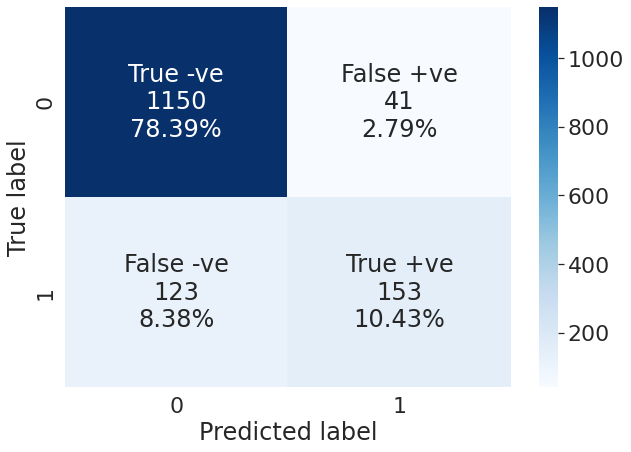

In [82]:
y_predict = bagging.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [83]:
scores(bagging)

Accuracy on training set :  0.9900613855597779
Accuracy on test set :  0.8882072256305386

Recall on training set :  0.953416149068323
Recall on test set :  0.5543478260869565

Precision on training set :  0.9935275080906149
Precision on test set :  0.788659793814433

F1 on training set :  0.9730586370839935
F1 on test set :  0.6510638297872341


*   The Bagging classifier accuracy is 0.89 and the F1 score is 0.65.
*   The Bagging classifier predicts 10.43% True positives

####Random Forest

In [84]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

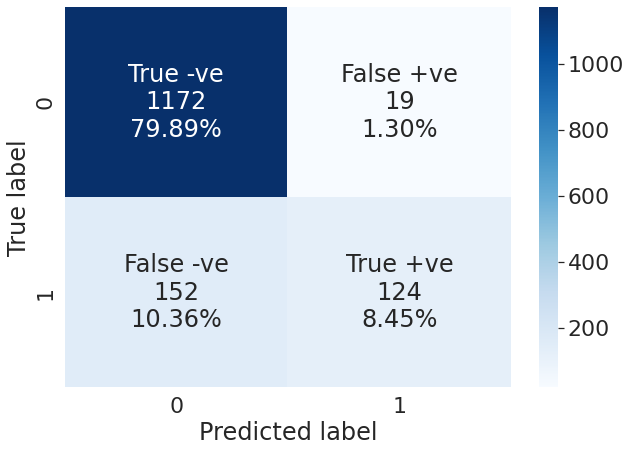

In [85]:
y_predict = random_forest.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [86]:
scores(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859

Recall on training set :  1.0
Recall on test set :  0.4492753623188406

Precision on training set :  1.0
Precision on test set :  0.8671328671328671

F1 on training set :  1.0
F1 on test set :  0.5918854415274463


*   The Random Forest accuracy is 0.88 and the F1 score is 0.59.
*   The Random Forest predicts 8.45% True positives

####Decision Tree

In [87]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25)

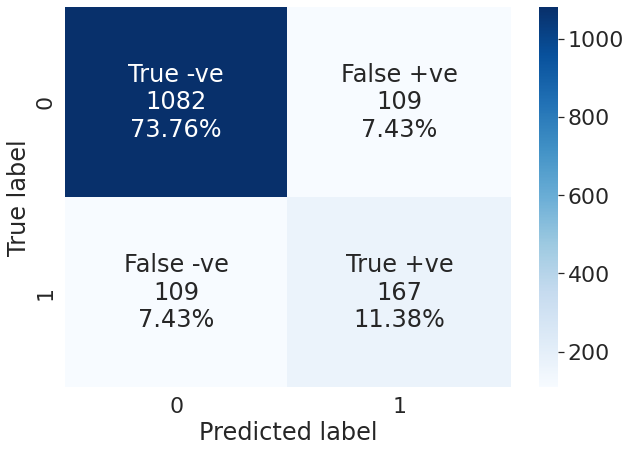

In [88]:
Dt.fit(X_train, y_train) #fit the train set to Decision tree
y_predict = Dt.predict(X_test) 
make_confusion_matrix(y_test,y_predict) #calculate confusion matrix

In [89]:
scores(Dt) #calculate the metric scores

Accuracy on training set :  1.0
Accuracy on test set :  0.8513974096796183

Recall on training set :  1.0
Recall on test set :  0.605072463768116

Precision on training set :  1.0
Precision on test set :  0.605072463768116

F1 on training set :  1.0
F1 on test set :  0.605072463768116


*   The Decision Tree accuracy is 0.85 and the F1 score is 0.60.
*   The Decision Tree predicts 11.38% True positives

**Of our untuned models, the bagging classifier has the best accuracy and F1 score.  The Decision Tree has the highest True Positives, but seems to be overfitting the model.**

Model Type|Accuracy|F1|TP
---|---|---|---
Bagging Classifier|0.89|0.65|10.43
Random Forest|0.88|0.59|8.45
Decision Tree|0.85|0.6|11.38

###Model performance improvement - Bagging
- Comment on which metric is right for model performance evaluation and why? 
- Comment on the model performance after tuning the Decision Tree, Bagging, and Random Forest classifier to improve the model performance.

###Model Evaluation Criterion
The model can make two kinds of wrong predictions:
*   Predicting that the customer will purchase a Travel Package but they do not (False Positive/FP)
*   Predicting that the customer will not purchase a Travel Package when they do (False Negative/FN)

The Travel company's objectives are :
*   Increase efficiency of marketing spend by only marketing existing packages to ideal customer profiles (ICP)
*   Identify the ICP for a newly introduced travel package

Given the above points, we'll strive to minimize the FP & FN values, optimizing models to have the highest possible F1 score.

####Tuning Bagging Clasifier

In [90]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25,bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

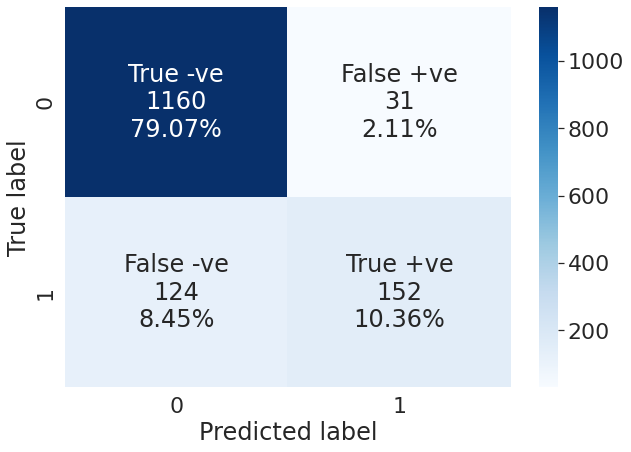

In [91]:
y_predict = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [92]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.8943421949556919

Recall on training set :  0.9953416149068323
Recall on test set :  0.5507246376811594

Precision on training set :  1.0
Precision on test set :  0.8306010928961749

F1 on training set :  0.9976653696498053
F1 on test set :  0.6623093681917211


Bagging Classifier|Accuracy|F1|TP
---|---|---|---
Base Model|0.89|0.65|10.43
Tuned Model|0.89|0.66|10.36

We see some minor improvement from the tuning parameters for the bagging model.


####Tuning Random Forest


In [93]:
# Grid of parameters to choose from
randomforest_tuned = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=29)

parameters = {"n_estimators": np.arange(10,60,5),
              'criterion':['gini','entropy'],
            "min_samples_leaf": np.arange(5,11,1),
            "max_features":['sqrt','log2'],
            "max_samples": np.arange(0.5, 1, 0.1),
             }

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_features='log2', max_samples=0.8999999999999999,
                       min_samples_leaf=5, n_estimators=55, random_state=29)

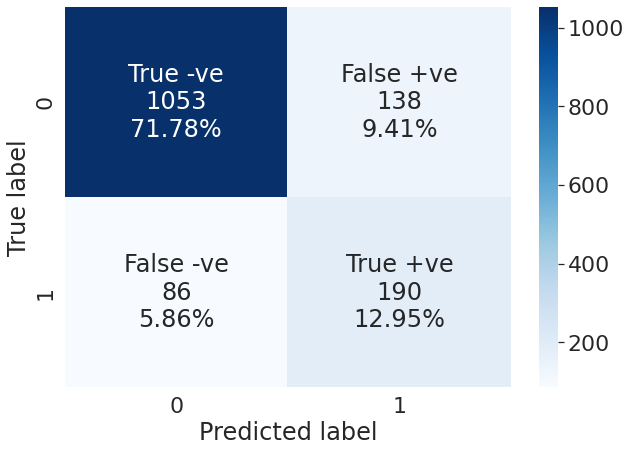

In [94]:
y_predict = rf_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [95]:
scores(rf_estimator_tuned)

Accuracy on training set :  0.9061677871967261
Accuracy on test set :  0.847307430129516

Recall on training set :  0.9456521739130435
Recall on test set :  0.6884057971014492

Precision on training set :  0.6804469273743017
Precision on test set :  0.5792682926829268

F1 on training set :  0.7914230019493178
F1 on test set :  0.6291390728476822


❗This takes a very long time to run. In colab, go to "runtime" > "change runtime type" > "hardware accelerator" and it'll let you switch from CPU to GPU (or even TPU).

Random Forest|Accuracy|F1|TP
---|---|---|---
Base Model|0.88|0.59|8.45
Tuned Model|0.85|0.63|12.95

Tuning seems to have improved the model, although accuracy is somewhat decreased.

####Tuning Decision Tree


In [96]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=25)

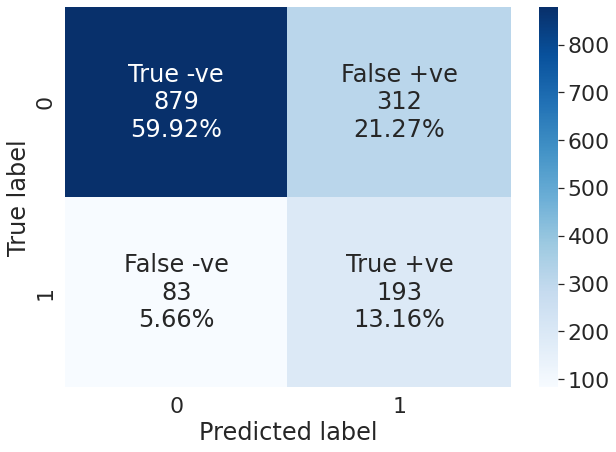

In [97]:
y_predict = classifier.predict(X_test) 
make_confusion_matrix(y_test,y_predict) 

In [98]:
scores(classifier)

Accuracy on training set :  0.7380882782812044
Accuracy on test set :  0.7307430129516019

Recall on training set :  0.7391304347826086
Recall on test set :  0.6992753623188406

Precision on training set :  0.3953488372093023
Precision on test set :  0.3821782178217822

F1 on training set :  0.5151515151515151
F1 on test set :  0.4942381562099872


Decision Tree|Accuracy|F1|TP
---|---|---|---
Base Model|0.85|0.6|11.38
Tuned Model|0.73|0.49|13.16

Our tuning parameters for this model seem to have a negative effect.

##Boosting
- Build Adaboost, GradientBoost, XGBoost, and Stacking classifiers 
- Comment on model performance

###Adaboost

In [99]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=25)

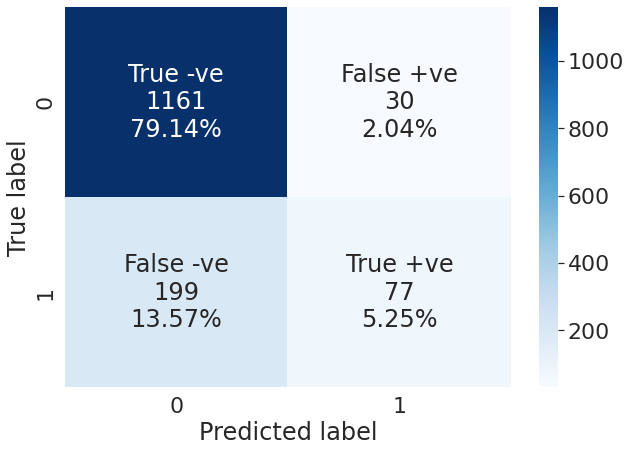

In [100]:
y_pred = Ada_boost.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [101]:
scores(Ada_boost)

Accuracy on training set :  0.8351359251680796
Accuracy on test set :  0.8438991138377642

Recall on training set :  0.25
Recall on test set :  0.27898550724637683

Precision on training set :  0.6652892561983471
Precision on test set :  0.719626168224299

F1 on training set :  0.36343115124153497
F1 on test set :  0.402088772845953


*   The Adaboost accuracy is 0.84 and the F1 score is 0.4
*   The Adaboost predicts 5.25% True positives

###Gradient Boost

In [102]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=25)

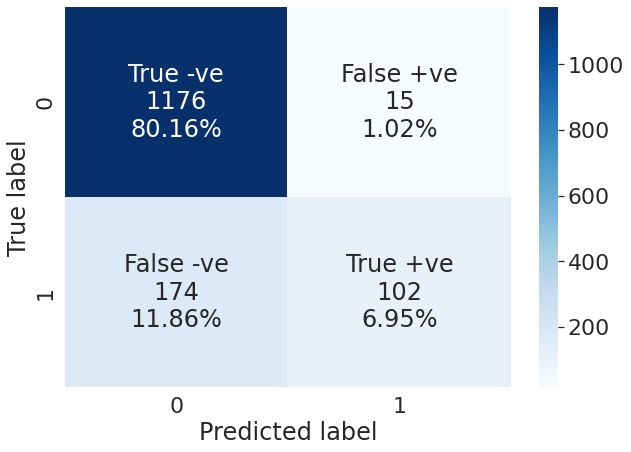

In [103]:
y_predict = Grad_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [104]:
scores(Grad_boost)

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8711656441717791

Recall on training set :  0.4332298136645963
Recall on test set :  0.3695652173913043

Precision on training set :  0.8480243161094225
Precision on test set :  0.8717948717948718

F1 on training set :  0.5734840698869477
F1 on test set :  0.5190839694656488


*   The Gradient Boost accuracy is 0.87 and the F1 score is 0.52
*   The Gradient Boost predicts 6.95% True positives

###XGBoost

In [105]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=25)

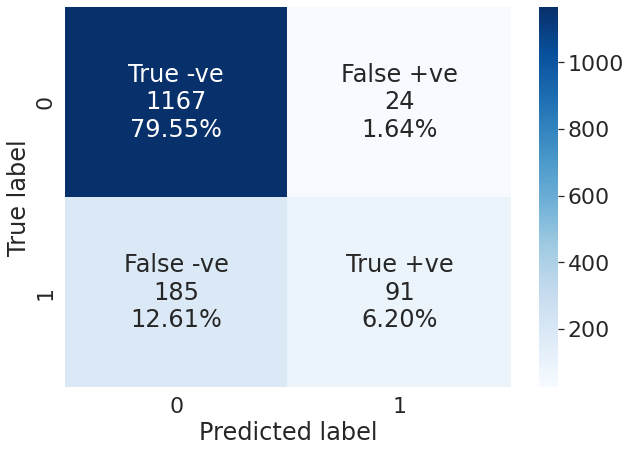

In [106]:
y_predict = XG_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [107]:
scores(XG_boost)

Accuracy on training set :  0.8705057000876937
Accuracy on test set :  0.8575323790047716

Recall on training set :  0.39285714285714285
Recall on test set :  0.32971014492753625

Precision on training set :  0.8295081967213115
Precision on test set :  0.7913043478260869

F1 on training set :  0.5331928345626975
F1 on test set :  0.46547314578005117


*   The XGBoost accuracy is 0.86 and the F1 score is 0.47
*   The XGBoost predicts 6.2% True positives

###Stacking Classifiers

In [108]:
from sklearn.ensemble import StackingClassifier

In [117]:
estimators = [('Random Forest',random_forest),('ADA Boosting',Ada_boost),('Decision Tree',Dt)]

final_estimator = XG_boost

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=25)),
                               ('ADA Boosting',
                                AdaBoostClassifier(random_state=25)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       random_state=25))],
                   final_estimator=XGBClassifier(eval_metric='logloss',
                                                 random_state=25))

In [120]:
scores(stacking_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964

Recall on training set :  1.0
Recall on test set :  0.6485507246376812

Precision on training set :  1.0
Precision on test set :  0.7955555555555556

F1 on training set :  1.0
F1 on test set :  0.7145708582834331


*   The Stacking Classifier accuracy is 0.9 and the F1 score is 0.7

Model Type|Accuracy|F1|TP
---|---|---|---
Adaboost|0.84|0.4|5.25
Gradient Boost|0.87|0.52|6.95
XGBoost|0.86|0.47|6.2
Stacking Classifiers|0.9|0.7|?

Stacking has the best outcome.

###Model performance improvement - Boosting
- Comment on which metric is right for model performance evaluation and why? 
- Comment on the model performance after tuning the AdaBoost, and Gradient Boosting classifier on the appropriate metric to improve the model performance. 
- Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost.

####Adaboost

In [110]:
# Choose the type of classifier. 
Ada_tuned = AdaBoostClassifier(random_state=25)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,60,10),
    'learning_rate': [0.05,0.15,0.45,0.75]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Ada_boost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.75, random_state=25)

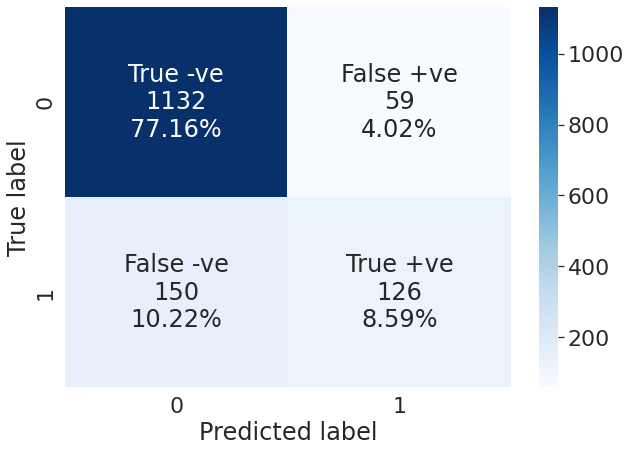

In [111]:
y_pred = Ada_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [112]:
scores(Ada_boost_tuned)

Accuracy on training set :  0.9239988307512423
Accuracy on test set :  0.8575323790047716

Recall on training set :  0.6708074534161491
Recall on test set :  0.45652173913043476

Precision on training set :  0.9
Precision on test set :  0.6810810810810811

F1 on training set :  0.7686832740213524
F1 on test set :  0.5466377440347071


*   The Adaboost accuracy is 0.86 and the F1 score is 0.55
*   The Adaboost predicts 6.59% True positives

####Gradient Boost

In [113]:
# Choose the type of classifier. 
Grad_boost_ada_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    'learning_rate': [0.05,0.15,0.5]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Grad_boost_ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Grad_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Grad_boost_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),
                           learning_rate=0.5, max_features=0.7, n_estimators=55,
                           random_state=25, subsample=0.7)

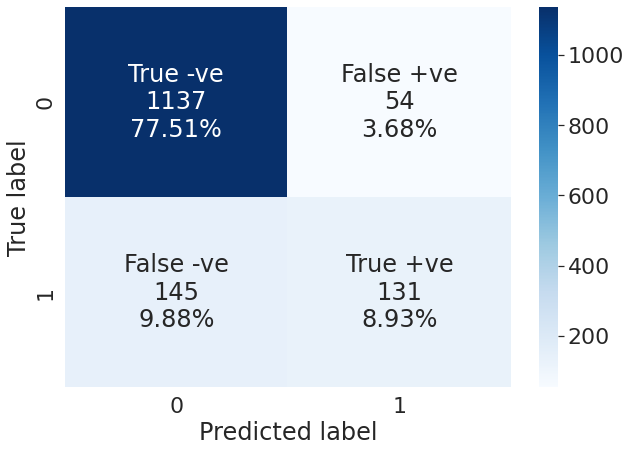

In [114]:
y_predict = Grad_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [115]:
scores(Grad_boost_tuned)

Accuracy on training set :  0.9105524700380005
Accuracy on test set :  0.8643490115882754

Recall on training set :  0.6257763975155279
Recall on test set :  0.4746376811594203

Precision on training set :  0.8611111111111112
Precision on test set :  0.7081081081081081

F1 on training set :  0.7248201438848921
F1 on test set :  0.5683297180043384


*   The tuned Gradient Boost model accuracy is 0.86 and the F1 score is 0.57
*   The tuned Gradient Boost model predicts 8.93% True positives

####Stacking Classifiers

In [123]:
estimators = [('Random Forest',rf_estimator_tuned),('ADA Boosting',Ada_boost_tuned),('Decision Tree',classifier)]

final_estimator = Grad_boost_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       criterion='entropy',
                                                       max_features='log2',
                                                       max_samples=0.8999999999999999,
                                                       min_samples_leaf=5,
                                                       n_estimators=55,
                                                       random_state=29)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.75,
                                                   random_state=25)),
                               ('Decision 

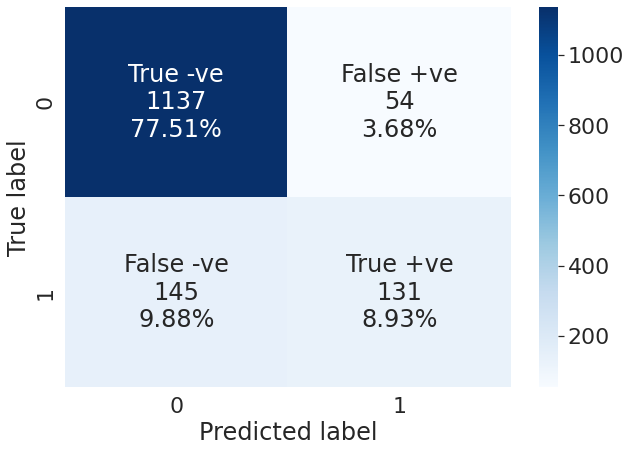

In [124]:
y_predict = Grad_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [125]:
scores(stacking_classifier)

Accuracy on training set :  0.9087985969014908
Accuracy on test set :  0.8452624403544649

Recall on training set :  0.7251552795031055
Recall on test set :  0.44565217391304346

Precision on training set :  0.7757475083056479
Precision on test set :  0.6243654822335025

F1 on training set :  0.7495987158908508
F1 on test set :  0.5200845665961945


*   The tuned Stacking Classifier model accuracy is 0.85 and the F1 score is 0.52
*   The tuned Stacking Classifier model predicts 8.93% True positives

Model Type|Accuracy|F1|TP
---|---|---|---
Tuned Adaboost|0.86|0.55|6.59
Tuned Gradient Boost|0.86|0.57|8.93
XGBoost*|NA|NA|NA
Tuned Stacking Classifiers|0.85|0.52|8.93

The tuned gradient boost model has the best outcome.

*We did not tune XGBoost due to insufficient processing power.

#Actionable Insights & Recommendations
- Compare model performance on various metrics. 
- Conclude with the key takeaways - What would your advice be to grow the business?

####Comparing All Models

In [127]:
# defining list of models
all_models = [Dt, classifier,bagging,bagging_estimator_tuned,random_forest, rf_estimator_tuned,
          Ada_boost, Ada_boost_tuned, Grad_boost, Grad_boost_tuned, XG_boost, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [129]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Tuned Bagging Classifier ',
                                          'Random Forest','Tuned Random Forest','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_F1-Score,Test_F1-Score
3,Tuned Bagging Classifier,0.999123,0.894342,0.997665,0.662309
2,Bagging Classifier,0.990061,0.888207,0.973059,0.651064
5,Tuned Random Forest,0.906168,0.847307,0.791423,0.629139
0,Decision Tree,1.000000,0.851397,1.000000,0.605072
4,Random Forest,1.000000,0.883436,1.000000,0.591885
9,Tuned Gradient Boosting Classifier,0.910552,0.864349,0.724820,0.568330
7,Tuned AdaBoost Classifier,0.923999,0.857532,0.768683,0.546638
11,Stacking Classifier,0.908799,0.845262,0.749599,0.520085
8,Gradient Boosting Classifier,0.878690,0.871166,0.573484,0.519084
1,Tuned Decision Tree,0.738088,0.730743,0.515152,0.494238


*   Almost all models are overfitting - gradient boost looks to be properly fit.
*   Tuned gradient boost seems to have the best general scores overall.

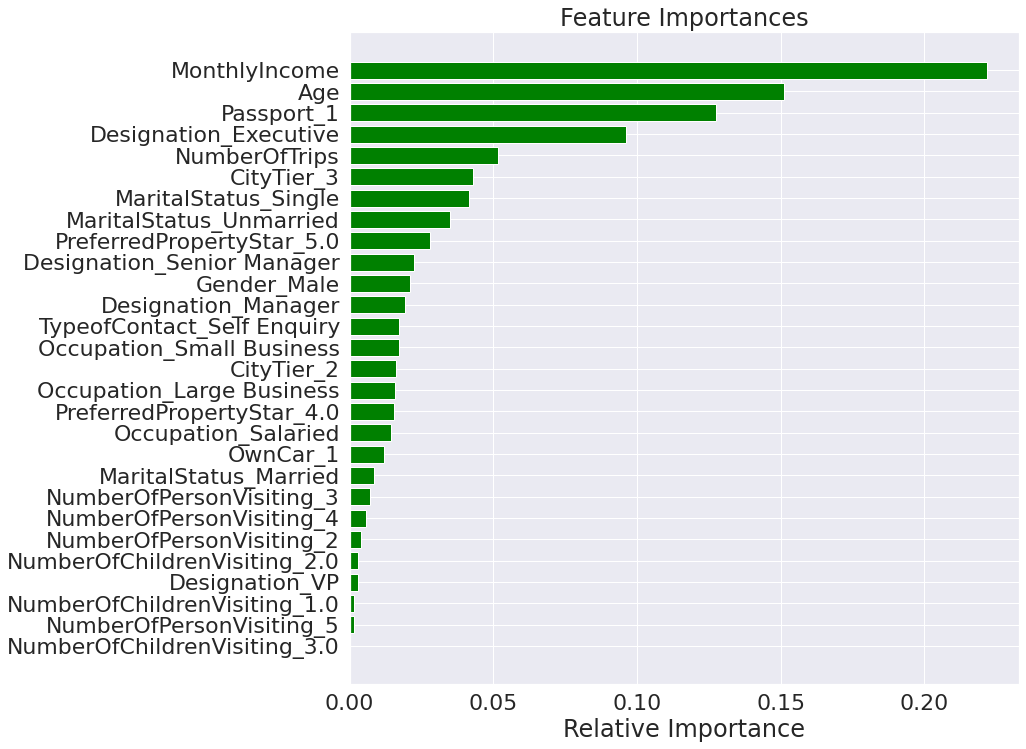

In [130]:
feature_names = X_train.columns
importances = Grad_boost_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [131]:
scores(Grad_boost_tuned)

Accuracy on training set :  0.9105524700380005
Accuracy on test set :  0.8643490115882754

Recall on training set :  0.6257763975155279
Recall on test set :  0.4746376811594203

Precision on training set :  0.8611111111111112
Precision on test set :  0.7081081081081081

F1 on training set :  0.7248201438848921
F1 on test set :  0.5683297180043384


The most importance features for this model are:
*   MonthlyIncome
*   Age
*   Passport_1(Customers with Passport)

This model has an 86% accuracy rate.

###Recommendations

**Recommendations:**

Here are some criteria the company can use to quickly select which package to market to a given lead:

Pitch This|Designation|Monthly Income|Age|Lead type|Car Required
---|---|---|---|---|---
*Basic*|Executive|17-22k|20's-early 30's|Inbound|No
*Deluxe*|Manager|21-24k|30s-40s|Inbound|No
*Standard*|Sr. Manager|24-28k|30s-40s|Inbound|No
*Super Deluxe*|AVP|28-32k|20's-early 30's|Outbound|Yes
*King*|VP|34-38k|40s-50s|Inbound|Yes

Longer pitches do not lead to more closed sales, and the pitch satisfaction is usually mediocre. As most sales are inbound, perhaps a lower touch e-commerce sales model should be considered.

Basic and Deluxe are the most popular packages.

We should analyze whether the new package has similar features to the existing packages, in order to make a hypothesis about the ideal customer profile.